In [42]:
%pylab inline
from numpy import *
from matplotlib.pyplot import *

t_dat = recfromtxt ('Desktop/10day.txt')[:,1]
print t_dat[0:100]
t_dat = t_dat[where((t_dat<4000) & (t_dat>200))]
t_data = t_dat*10./4096
print t_data[0:10]


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.[ 233 1618  787  473  670  192 1300 1600  886 1347  467  710 1883  469  784
  310  434 2974 3824 1088 1435 2060 1679  139 2229  763  295  498 2086 2840
  937 1601  191  225  713  460 1125  840 1966  495 1292  295  717  901 1252
  327  347  350  581  902  693 1049  509  891  555 1806  346  387 1052  905
  454  460 1034 1205 1127 1214   64 2588 1101  148  740  226 2296 1108  477
  363 3356  570  199  849   93  499  396 3309  279 2753 1425   65  188  472
  470  919  314  100  317 1612  111  498 1596  406]
[ 0.56884766  3.95019531  1.92138672  1.15478516  1.63574219  3.17382812
  3.90625     2.16308594  3.28857422  1.14013672]

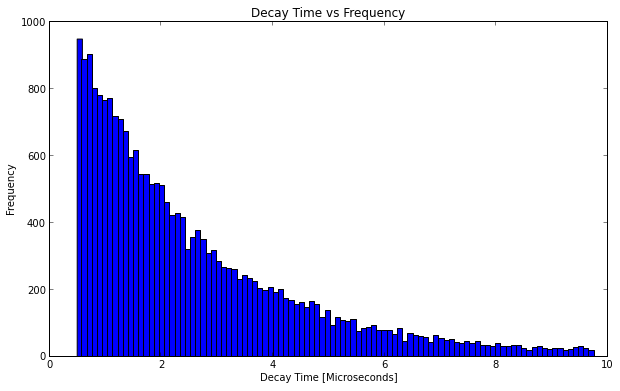

In [43]:
figure(figsize=(10,6))
hist(t_data, bins = 100)
xlabel('Decay Time [Microseconds]')
ylabel('Frequency')
title('Decay Time vs Frequency')

In [44]:
n_bin,bin_edges = histogram(t_data, bins = 100)
print n_bin[0:10],bin_edges[0:10]

[949 887 900 801 779 764 770 716 706 672] [ 0.49072266  0.58344727  0.67617187  0.76889648  0.86162109  0.9543457
  1.04707031  1.13979492  1.23251953  1.32524414]

[ 0.53708496  0.62980957  0.72253418  0.81525879  0.9079834   1.00070801
  1.09343262  1.18615723  1.27888184  1.37160645  1.46433105  1.55705566
  1.64978027  1.74250488  1.83522949  1.9279541   2.02067871  2.11340332
  2.20612793  2.29885254  2.39157715  2.48430176  2.57702637  2.66975098
  2.76247559  2.8552002   2.9479248   3.04064941  3.13337402  3.22609863
  3.31882324  3.41154785  3.50427246  3.59699707  3.68972168  3.78244629
  3.8751709   3.96789551  4.06062012  4.15334473  4.24606934  4.33879395
  4.43151855  4.52424316  4.61696777  4.70969238  4.80241699  4.8951416
  4.98786621  5.08059082  5.17331543  5.26604004  5.35876465  5.45148926
  5.54421387  5.63693848  5.72966309  5.8223877   5.9151123   6.00783691
  6.10056152  6.19328613  6.28601074  6.37873535  6.47145996  6.56418457
  6.65690918  6.74963379  6.8423584   6.93508301  7.02780762  7.12053223
  7.21325684  7.30598145  7.39870605  7.49143066  7.58415527  7.67687988
  7.76960449  7.8623291   7.95505371  8.04777832  8.

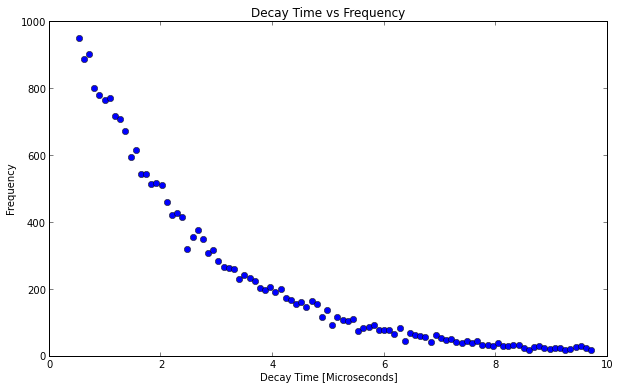

In [45]:
t_bin = bin_edges[:-1] + (bin_edges[1]-bin_edges[0])/2
print t_bin,n_bin
figure(figsize=(10,6))
plot(t_bin, n_bin, 'bo')
xlabel('Decay Time [Microseconds]')
ylabel('Frequency')
title('Decay Time vs Frequency')

In [46]:
from scipy.optimize import leastsq

In [47]:
fitfxn = lambda p, x : p[0]*exp(-p[1]*x)+p[2] 
errfxn = lambda p, x, y: fitfxn(p,x) -y
parameters, foo = leastsq(errfxn, (300, 3, 5), args=(t_bin, n_bin))

In [48]:
parameters
print parameters
print 1/parameters[1]

[  1.21875082e+03   4.69170923e-01   4.79263992e+00]
2.13141938468

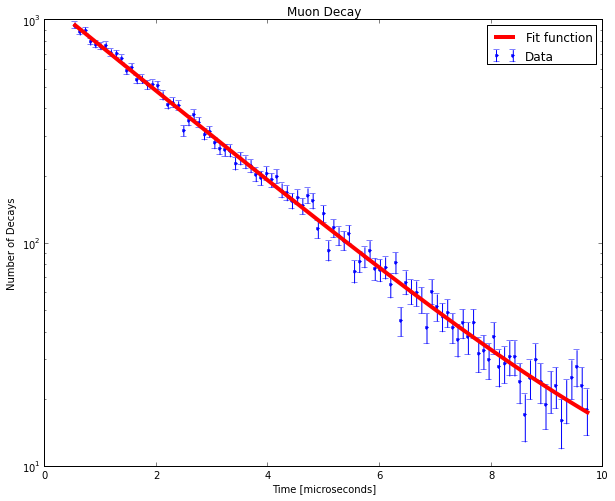

In [49]:
chordsfigure(figsize=(10,8))
errbar = sqrt(n_bin)
errorbar (t_bin, n_bin, errbar, fmt = 'b.', label ='Data')
plot(t_bin, fitfxn(parameters, t_bin), 'r', linewidth = 4, label='Fit function')
sqr = sqrt( fitfxn(parameters, t_bin))
#print 2*sqr
legend()
xlabel('Time [microseconds]')
ylabel('Number of Decays')
title('Muon Decay')
yscale('log')

In [50]:
from scipy.optimize import curve_fit
def exponential(x,N_0,tau,C):
    return N_0*exp(-tau*x)+C
    
def exponential1(x,N_0,tau):
    return N_0*exp(-tau*x)+1

In [51]:
px,cov = curve_fit(exponential,t_bin,n_bin,p0=([300,3,1]))

In [52]:
print px

[  1.21875082e+03   4.69170920e-01   4.79263796e+00]

In [53]:
chi2 = numpy.sum(((n_bin-exponential(t_bin,*px))/numpy.sqrt(n_bin))**2)/(n_bin.size-4)
print chi2

1.0700989979

In [54]:
print sqrt(cov)
print 1./px[1]

[[  1.01839281e+01   2.24046373e-01   2.98105847e+00]
 [  2.24046373e-01   7.23084050e-03   1.40281055e-01]
 [  2.98105847e+00   1.40281055e-01   3.38098806e+00]]
2.13141939925

In [55]:
print parameters

[  1.21875082e+03   4.69170923e-01   4.79263992e+00]

In [56]:
1./parameters[1]

2.1314193846760472

In [65]:
1.04/parameters[1]

2.2166761600630891

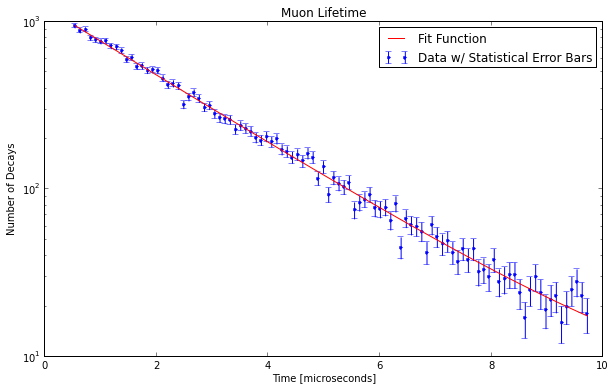

In [57]:
figure(figsize = (10,6))
errbar=sqrt(n_bin)
errorbar(t_bin,n_bin,errbar, fmt='b.', label ='Data w/ Statistical Error Bars')
plot(t_bin,exponential(t_bin,*px),'r',label = 'Fit Function')
legend()
xlabel('Time [microseconds]')
ylabel('Number of Decays')
title('Muon Lifetime')
yscale('log')